1. Is there any significant difference in sales for different Stores ?
==================
2. Is sales depended on days ?
=========
2. Forcasting Sales for future date so that management can allocate more resources based on needs
============

A. Read data
===========

In [96]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression, make_classification


train=pd.read_csv("dataset/train.csv")
test=pd.read_csv("dataset/test.csv")
store=pd.read_csv("dataset/store.csv")




Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [ ]:
#in case if you dont have a dataset. Generate some artificial dataset
n_features=18
train, y = make_regression(n_samples=1000, n_features=n_features, n_informative=5, random_state=1)
x_train,x_test,y_train, y_test=train_test_split(train,y,test_size=0.2,random_state=42)

B. Fill missing Values and join Tables
==============
Becareful about data leakage

In [90]:
#fill missing
# Data Leakage may happen
print(train['Sales'].isnull().sum())
train.fillna(value=0,inplace=True)
store.fillna(value=0,inplace=True)
test.fillna(value=0,inplace=True)

#train.dropna(inplace=False)
#store.dropna(inplace=False)
#test.dropna(inplace=False)

#Join tables
train=pd.merge(train,store,on="Store")
test=pd.merge(test,store,on="Store")
train.head(10)


0


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
5,1,7,2015-07-26,0,0,0,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
6,1,6,2015-07-25,4364,500,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
7,1,5,2015-07-24,3706,459,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
8,1,4,2015-07-23,3769,503,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
9,1,3,2015-07-22,3464,463,1,0,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0


Convert non numeric to numeric
=============

In [79]:
def process_data(data, isTest = False):
    # label encode some features
    mappings = {'0':0, 'a':1, 'b':2, 'c':3, 'd':4}
    
    data.StoreType.replace(mappings, inplace=True)
    data.Assortment.replace(mappings, inplace=True)
    data.StateHoliday.replace(mappings, inplace=True)
    data.PromoInterval.replace(mappings, inplace=True)
    # extract some features from date column  
    data['Date'] =pd.to_datetime(data["Date"])
    data['Month'] =data.Date.dt.month
    data['Day'] = data.Date.dt.day
    #data=data.drop(["Date"], axis=1)
    return data
train=process_data(train)



In [80]:
train["Sales"].describe()

count    1.017209e+06
mean     5.773819e+03
std      3.849926e+03
min      0.000000e+00
25%      3.727000e+03
50%      5.744000e+03
75%      7.856000e+03
max      4.155100e+04
Name: Sales, dtype: float64

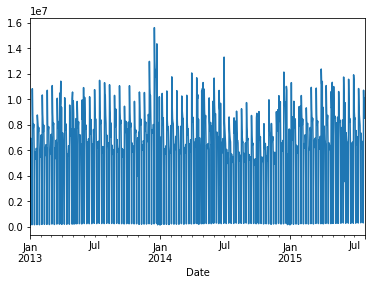

In [81]:
import seaborn as sns
#sns.lineplot(train["Date"],train["Sales"])
train.groupby(["Date"])["Sales"].sum().plot()
#train["Date","Sales"].plot()



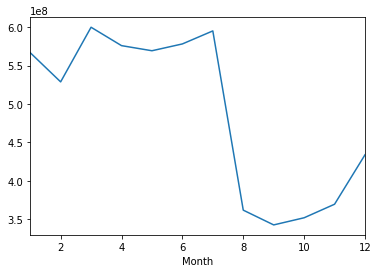

In [82]:
train.groupby(["Month"])["Sales"].sum().plot()

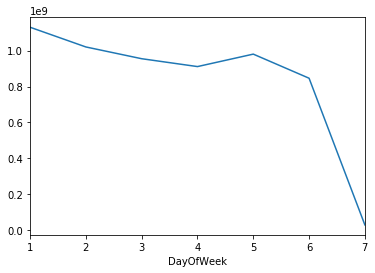

In [83]:
#data is not stationary
train.groupby(["DayOfWeek"])["Sales"].sum().plot()

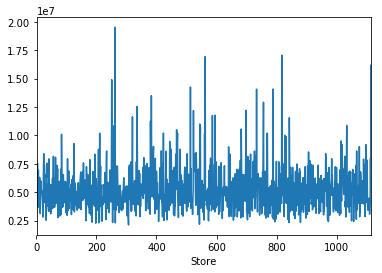

In [61]:
train.groupby(["Store"])["Sales"].sum().plot()

In [88]:
train.groupby(["Store"])["Sales"].median().reset_index(name="median")#4373.5
store1sa=train[train["Store"]==1]
print(store1sa["Sales"].median())

4373.5


Answer question one
===================
 Is there any significant difference in sales for different Stores ?
 Null Hypothesis, Ho=there is no significant difference 

In [10]:

import random
import numpy as np
stores_sales_n=train.groupby(["Store"]).size().reset_index(name='counts')
stores_sales_mean=train.groupby(["Store"])["Sales"].mean().reset_index(name='mean')
stores_sales_sd=train.groupby(["Store"])["Sales"].std().reset_index(name='std')




[502, 372]


Verify whether Data following central limit theorem
===========

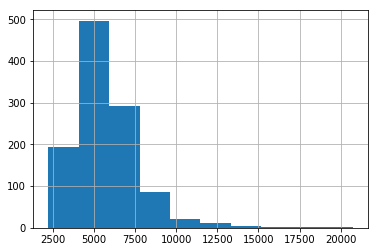

In [11]:
stores_sales_mean["mean"].hist()

Perform T-test
===============

In [12]:
#https://www.graphpad.com/quickcalcs/ttest1.cfm
#http://vassarstats.net/anova1u.html
random_store=random.choices(range(len(stores_sales_n)), k=2)
print(random_store)
print (stores_sales_n.iloc[random_store])
print (stores_sales_mean.iloc[random_store])
print (stores_sales_sd.iloc[random_store])

     Store  counts
502    503     942
372    373     942
     Store         mean
502    503  5546.279193
372    373  3736.943737
     Store          std
502    503  3103.253521
372    373  1976.742718


Perform ANOVA
============

In [13]:
random_store=random.choices(stores_sales_n["Store"].unique(), k=3)
nrows=10
store_1_sales=train[train["Store"]==random_store[0]]["Sales"]
store_1_sales=store_1_sales[0:nrows]
store_2_sales=train[train["Store"]==random_store[1]]["Sales"]
store_2_sales=store_2_sales[0:nrows]
store_3_sales=train[train["Store"]==random_store[2]]["Sales"]
store_3_sales=store_3_sales[0:nrows]
print(store_1_sales.to_string(index=False, header=False))
print ("===")
print(store_2_sales.to_string(index=False, header=False))
print ("===")
print(store_3_sales.to_string(index=False, header=False))


 6268
 6064
 4321
 5019
 7023
    0
 3755
 3866
 4252
 2962
===
 8711
 5449
 4890
 5605
 6644
    0
 2899
 4727
 3275
 3533
===
 7839
 6442
 5276
 5984
 7291
    0
 5113
 4903
 5525
 4825


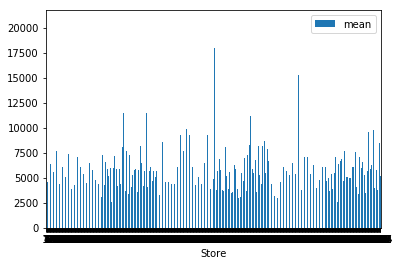

In [14]:
stores_sales_mean.plot.bar(x='Store', y='mean', rot=0)

In [ ]:
from statsmodels.tsa.stattools import adfuller#Dickey-Fuller test
#Ho: It is stationary--There no significat difference in mean, var
#H1: It is Non stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("Data is not stationary")
    else:
        print("There is strong evidence data is stationary")
        
adfuller_test(train["Sales"])       


In [71]:
Y=train["Sales"]
train.drop(["Date"],axis=1,inplace=True)
#train.drop(["Sales"],axis=1,inplace=True)
train.drop(["PromoInterval"],axis=1,inplace=True)
#train.drop(["Customers"],axis=1,inplace=True)
train.drop(['Assortment'],axis=1,inplace=True)
train.drop(["CompetitionOpenSinceMonth"],axis=1,inplace=True)
train.drop(["CompetitionOpenSinceYear"],axis=1,inplace=True)
train.drop(["Promo2SinceWeek"],axis=1,inplace=True)
train.drop(["Promo2SinceYear"],axis=1,inplace=True)
train.drop(["Promo2"],axis=1,inplace=True)


In [45]:
train.head(5)

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,CompetitionDistance,Month,Day
0,1,5,5263,555,1,1,0,1,3,1270.0,7,31
1,1,4,5020,546,1,1,0,1,3,1270.0,7,30
2,1,3,4782,523,1,1,0,1,3,1270.0,7,29
3,1,2,5011,560,1,1,0,1,3,1270.0,7,28
4,1,1,6102,612,1,1,0,1,3,1270.0,7,27


In [72]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
#print(X.info())
#print(X.describe())

#normalize_feature=train["Customers"]
#normalize_feature=pd.concat([Y,normalize_feature], axis=1)
#normalize_feature=np.array(normalize_feature)
#print(normalize_feature.head())
#standardScaler=StandardScaler()
#standardScaler.fit(normalize_feature)
#normalized_samples=standardScaler.transform(normalize_feature)
#train["Customers"]=["Customers"]
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

X=np.array(train).astype(np.float)
n_samples_split=int(len(X)*0.2)
x_train=X[:-n_samples_split]
y_train=Y[:-n_samples_split]
x_test=X[-n_samples_split:]
y_test=Y[-n_samples_split:]
print(x_train.shape, y_train.shape)


    

(813768, 11) (813768,)


Deep Learning
============

In [47]:
#break the time seriese based on window
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [48]:
import numpy as np
time_steps=10
print(x_train.shape,y_train.shape)
x_train=np.array(x_train.astype(np.float))
x_test=np.array(x_test.astype(np.float))

y_train=np.array(y_train.astype(np.float))
y_test=np.array(y_test.astype(np.float))
# reshape to [samples, time_steps, n_features]
X_train, Y_train = create_dataset(x_train,y_train, time_steps)
X_test, Y_test = create_dataset(x_test, y_test, time_steps)

print(X_train.shape, Y_train.shape)
print(X_train[0])
print(Y_train[0])

(813768, 12) (813768,)
(813758, 10, 12) (813758,)
[[1.000e+00 5.000e+00 5.263e+03 5.550e+02 1.000e+00 1.000e+00 0.000e+00
  1.000e+00 3.000e+00 1.270e+03 7.000e+00 3.100e+01]
 [1.000e+00 4.000e+00 5.020e+03 5.460e+02 1.000e+00 1.000e+00 0.000e+00
  1.000e+00 3.000e+00 1.270e+03 7.000e+00 3.000e+01]
 [1.000e+00 3.000e+00 4.782e+03 5.230e+02 1.000e+00 1.000e+00 0.000e+00
  1.000e+00 3.000e+00 1.270e+03 7.000e+00 2.900e+01]
 [1.000e+00 2.000e+00 5.011e+03 5.600e+02 1.000e+00 1.000e+00 0.000e+00
  1.000e+00 3.000e+00 1.270e+03 7.000e+00 2.800e+01]
 [1.000e+00 1.000e+00 6.102e+03 6.120e+02 1.000e+00 1.000e+00 0.000e+00
  1.000e+00 3.000e+00 1.270e+03 7.000e+00 2.700e+01]
 [1.000e+00 7.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.270e+03 7.000e+00 2.600e+01]
 [1.000e+00 6.000e+00 4.364e+03 5.000e+02 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 3.000e+00 1.270e+03 7.000e+00 2.500e+01]
 [1.000e+00 5.000e+00 3.706e+03 4.590e+02 1.000e+00 0.000e+00 0.000e+00
  0

In [49]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import tensorflow.keras as keras

#cell, input gate, an output gate and a forget gate
model=Sequential()
model.add(LSTM(units=128, input_shape=(X_train.shape[1],X_train.shape[2]), return_sequences=True)) ##stake of LSTM is used 
model.add(LSTM(units=64, activation='relu', return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(units=1))
model.compile(
  loss='mean_squared_error',
  optimizer=keras.optimizers.Adam(0.001)
)


In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 10, 128)           72192     
_________________________________________________________________
lstm_6 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 121,665
Trainable params: 121,665
Non-trainable params: 0
_________________________________________________________________


In [51]:
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=2048,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Epoch 1/50
358/358 [==============================] - 12s 34ms/step - loss: 18205660.0000 - val_loss: 14620394.0000
Epoch 2/50
358/358 [==============================] - 12s 33ms/step - loss: 14827699.0000 - val_loss: 13554746.0000
Epoch 3/50
358/358 [==============================] - 12s 33ms/step - loss: 14619934.0000 - val_loss: 12211666.0000
Epoch 4/50
358/358 [==============================] - 12s 33ms/step - loss: 12916920.0000 - val_loss: 11761150.0000
Epoch 5/50
358/358 [==============================] - 12s 33ms/step - loss: 11633499.0000 - val_loss: 9950099.0000
Epoch 6/50
358/358 [==============================] - 12s 33ms/step - loss: 10452905.0000 - val_loss: 8322243.5000
Epoch 7/50
358/358 [==============================] - 12s 34ms/step - loss: 10127087.0000 - val_loss: 8297357.0000
Epoch 8/50
358/358 [==============================] - 12s 33ms/step - loss: 10447831.0000 - val_loss: 9105411.0000
Epoch 9/50
358/358 [==============================] - 12s 33ms/step - loss: 

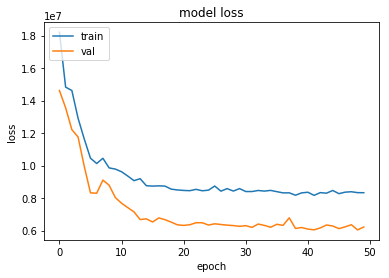

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

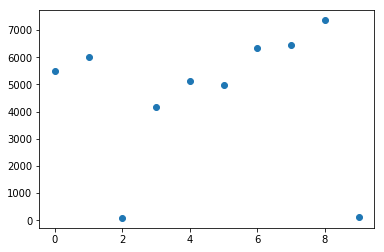

In [53]:
#predict for next 10 days
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=model.predict(X_train[-10:])
#print(mean_squared_error(y_test,y_pred))
x=range(10)
plt.scatter(x,y_pred)

Regression model
============

In [7]:
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm

model=sm.OLS(y_train,x_train)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                          1.703e+06
Date:                Wed, 16 Jun 2021   Prob (F-statistic):                        0.00
Time:                        17:22:24   Log-Likelihood:                     -7.0624e+06
No. Observations:              813768   AIC:                                  1.412e+07
Df Residuals:                  813757   BIC:                                  1.413e+07
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [73]:

from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
randomForestRegressor=RandomForestRegressor(n_estimators=10)
randomForestRegressor.fit(x_train,y_train)



RandomForestRegressor(n_estimators=10)

[2.81189172e-02 6.46878677e-03 8.63417061e-01 0.00000000e+00
 1.79600384e-02 1.46864083e-04 5.37351458e-04 3.22098840e-02
 4.24910563e-02 4.24770390e-03 4.40233695e-03]


Text(0.5, 0, 'Feature Importance')

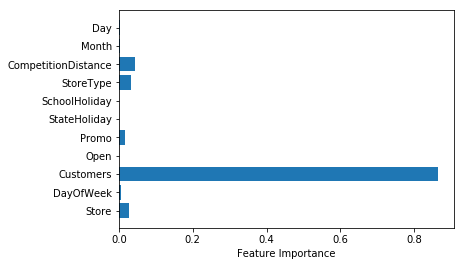

In [74]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from  sklearn.inspection import permutation_importance

print(randomForestRegressor.feature_importances_)

plt.barh(train.columns, randomForestRegressor.feature_importances_)
plt.xlabel("Feature Importance")


68.32972675124493


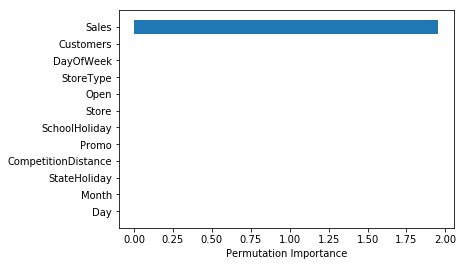

In [56]:
perm_importance = permutation_importance(randomForestRegressor, x_test, y_test)
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


y_pred=randomForestRegressor.predict(x_test)
print(mean_squared_error(y_test,y_pred))

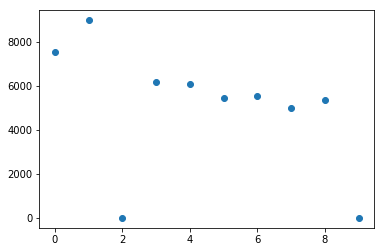

In [35]:
#predict for next 10 days
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt

y_pred=randomForestRegressor.predict(x_train[-10:])
#print(mean_squared_error(y_test,y_pred))
x=range(10)
plt.scatter(x,y_pred)

XGBoost 
=========


In [442]:
print(np.argwhere(x_test==0))
y_pred=xgb.predict(x_test[0:5])
print(mean_squared_error(y_test,y_pred))

[[     0      4]
 [     0      5]
 [     0      6]
 ...
 [203440      2]
 [203440      3]
 [203440      4]]


XGBoostError: [15:56:50] ../src/c_api/c_api_utils.h:161: Invalid missing value: null
Stack trace:
  [bt] (0) /usr/local/lib/python3.6/dist-packages/xgboost/lib/libxgboost.so(+0x9133f) [0x7f39a334c33f]
  [bt] (1) /usr/local/lib/python3.6/dist-packages/xgboost/lib/libxgboost.so(+0x9c811) [0x7f39a3357811]
  [bt] (2) /usr/local/lib/python3.6/dist-packages/xgboost/lib/libxgboost.so(+0x9cac0) [0x7f39a3357ac0]
  [bt] (3) /usr/local/lib/python3.6/dist-packages/xgboost/lib/libxgboost.so(XGBoosterPredictFromDense+0x225) [0x7f39a333f005]
  [bt] (4) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call_unix64+0x4c) [0x7f43475c3dae]
  [bt] (5) /usr/lib/x86_64-linux-gnu/libffi.so.6(ffi_call+0x22f) [0x7f43475c371f]
  [bt] (6) /usr/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(_ctypes_callproc+0x2b4) [0x7f43477d75c4]
  [bt] (7) /usr/lib/python3.6/lib-dynload/_ctypes.cpython-36m-x86_64-linux-gnu.so(+0x11c33) [0x7f43477d7c33]
  [bt] (8) /usr/bin/python3(_PyObject_FastCallKeywords+0x19c) [0x5aa69c]

